In [1]:
import random
import scipy
from scipy import stats
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

NO_OF_TRACES = 100
TOTAL_POWER_TRACE_POINTS = 2500

------

# Reading waveform.csv and dividing up plaintexts and power traces

In [2]:
# collection_data = pd.read_csv('waveform.csv')
# collection_data.loc[-1] = collection_data.columns  # adding a row
# collection_data.index = collection_data.index + 1  # shifting index
# collection_data.sort_index(inplace=True) 
# trace_columns = ["Trace " + str(i) for i in range(1,TOTAL_POWER_TRACE_POINTS+1)]
# collection_data.columns = ['Plaintext', 'Ciphertext'] + trace_columns
# collection_data.shape

In [3]:
# collection_data.head(5)

In [4]:
collection_data = pd.read_csv('waveform.csv')
power_traces = collection_data.drop(['Plaintext', 'Ciphertext'], axis='columns')
# power_traces.to_csv('power_traces.csv')

In [5]:
def str_to_hex(pt):
    byte_list = [pt[i:i+2] for i in range(0,len(pt), 2)]
    return [hex(int(i, 16)) for i in byte_list]

def hex_to_int(byte_list):
    return [int(i, 0) for i in byte_list]

def str_to_int(pt):
    byte_list = [pt[i:i+2] for i in range(0,len(pt), 2)]
    return [int(i, 16) for i in byte_list]

In [6]:
# plaintext_data = collection_data['Plaintext'].to_numpy()
# sample_plaintext = plaintext_data[0]
# print(sample_plaintext)
# pt_strhex = str_to_int(sample_plaintext)
# print(pt_strhex)

In [7]:
pt_divided_by_bytes = np.array([str_to_int(i) for i in collection_data['Plaintext'].to_numpy()])
pt_divided_by_bytes_df = pd.DataFrame(pt_divided_by_bytes, columns = ["byte_" + str(i) for i in range(16)])
pt_divided_by_bytes_df.shape

(100, 16)

In [8]:
def hw(int_no):
    # Write Code to calculate the number of ones in a byte...
    weight = 0

    while int_no:
        weight += 1
        int_no &= int_no - 1
    
    return weight
    

Sbox = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

# For first bytes of all PTs

In [9]:
# Here, we generate random values for first byte of plaintext...
#  This is the array containing first byte of all the plaintexts...
plaintext_first_bytes = pt_divided_by_bytes_df['byte_0'].to_list()

print("\nFirst byte of plaintexts.... This is the array containing first byte of all the plaintexts...\n")
print(plaintext_first_bytes)


First byte of plaintexts.... This is the array containing first byte of all the plaintexts...

[33, 55, 121, 128, 9, 218, 27, 49, 45, 65, 130, 11, 157, 222, 104, 241, 7, 0, 8, 30, 167, 117, 254, 63, 14, 74, 211, 233, 227, 108, 185, 137, 203, 95, 160, 39, 61, 126, 192, 145, 210, 230, 39, 245, 55, 77, 214, 23, 223, 245, 55, 120, 71, 93, 158, 223, 174, 239, 8, 73, 210, 91, 157, 120, 186, 251, 72, 22, 159, 225, 106, 243, 191, 213, 94, 159, 40, 177, 185, 66, 203, 155, 221, 102, 176, 57, 194, 75, 26, 22, 44, 109, 246, 69, 206, 16, 153, 34, 171, 121]


In [10]:
# Now, let us try to build a model for all possible values of key byte using the plaintext inputs...

# Let a given first plaintext byte be denoted as x... For each first plaintext byte x, try to calculate Sbox(x xor k) where k is the first key byte...
# For example, let us build a model for k = 0x20...

k = 32
leaky_sbox_output_value_array = []

for i in range(NO_OF_TRACES):
    add_round_key = plaintext_first_bytes[i]^k
    sbox_output = Sbox[add_round_key]
    leaky_sbox_output_value_array.append(sbox_output)


print("\n\nValue of Leaky Sbox values for first plaintext byte....\n")

print(leaky_sbox_output_value_array)



Value of Leaky Sbox values for first plaintext byte....

[124, 240, 203, 224, 165, 45, 226, 130, 215, 239, 58, 241, 122, 187, 82, 62, 204, 183, 52, 178, 23, 252, 29, 192, 49, 2, 13, 221, 46, 41, 238, 211, 233, 210, 205, 197, 164, 88, 225, 200, 137, 180, 197, 3, 240, 60, 66, 154, 22, 3, 240, 106, 133, 255, 174, 22, 25, 138, 52, 249, 137, 33, 122, 106, 184, 185, 69, 5, 8, 120, 214, 102, 219, 230, 243, 8, 48, 129, 238, 170, 233, 234, 84, 90, 96, 212, 152, 127, 128, 5, 254, 227, 246, 77, 40, 4, 86, 119, 61, 203]


In [11]:
# Now, we know these are the leaky values... How do these values leak through the power side-channel... They leak as their hamming weights... So, we need to
# calculate the hamming weight of these leaky values...

hamming_weight_of_leaky_sbox_bytes = []
print("\n\nHamming Weight of Leaky Sbox values for first plaintext byte....\n")

# Write Code to fill up the hamming_weight_of_leaky_sbox_bytes with HW(Sbox(x xor k))...

for byte in range(NO_OF_TRACES):
    hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

print(hamming_weight_of_leaky_sbox_bytes)



Hamming Weight of Leaky Sbox values for first plaintext byte....

[5, 4, 5, 3, 4, 4, 4, 2, 6, 7, 4, 5, 5, 6, 3, 5, 4, 6, 3, 4, 4, 6, 4, 2, 3, 1, 3, 6, 4, 3, 6, 5, 5, 4, 5, 4, 3, 3, 4, 3, 3, 4, 4, 2, 4, 4, 2, 4, 3, 2, 4, 4, 3, 8, 5, 3, 3, 3, 3, 6, 3, 2, 5, 4, 4, 5, 3, 2, 1, 4, 5, 4, 6, 5, 6, 1, 2, 2, 6, 4, 5, 5, 3, 4, 2, 4, 3, 7, 1, 2, 7, 5, 6, 4, 2, 1, 4, 6, 5, 5]


# For first byte of all PTs and entire kye byte possibility

In [12]:
def get_power_model(key_byte, plaintext_first_bytes, no_of_traces, Sbox):
    hamming_weight_of_leaky_sbox_bytes = []
    for i in range(no_of_traces):
        add_round_key = plaintext_first_bytes[i]^key_byte
        sbox_output = Sbox[add_round_key]
        hamming_weight = hw(sbox_output)
        hamming_weight_of_leaky_sbox_bytes.append(hamming_weight)
    return hamming_weight_of_leaky_sbox_bytes

In [13]:
# hamming_weight_of_leaky_sbox_bytes is your hypothetical Power Model for k = 20...

# But, as an attacker you do not know what is the value of k, then you try to build a model for all values of k...

# Write Code to build a hypothetical power model for all values of k... This is called a power model matrix...

no_of_possible_values_of_key_byte = 256
power_model_matrix = []
for k in range(no_of_possible_values_of_key_byte):
    power_model_matrix.append(get_power_model(k, plaintext_first_bytes, NO_OF_TRACES, Sbox))

pmm_np = np.array(power_model_matrix) # (256, 100)

# An Example power trace

In [14]:
### Power trace example - replace with actual power trace

def generate_random_noise(noise_standard_deviation):
    n = random.normalvariate(0,noise_standard_deviation)
    return n

def generate_trace(trace_input, noisy=False, noise_standard_deviation=0.05):
    lowest_hw = 0
    highest_hw = 8
    trace = []
    if noisy:
        for i in range(0,len(trace_input)):
            trace_point = (trace_input[i]-float(lowest_hw))/highest_hw + generate_random_noise(noise_standard_deviation)
            trace.append(trace_point)
    else:
        for i in range(0,len(trace_input)):
            trace_point = (trace_input[i]-float(lowest_hw))/highest_hw
            trace.append(trace_point)

    return trace

In [15]:
correct_key_byte = 21
correct_ideal_trace = power_model_matrix[correct_key_byte]
print(correct_ideal_trace)

[2, 4, 2, 3, 4, 3, 5, 4, 3, 1, 2, 4, 3, 5, 8, 4, 4, 4, 3, 4, 5, 3, 5, 5, 6, 6, 4, 3, 2, 5, 3, 6, 4, 5, 5, 3, 3, 7, 2, 6, 4, 3, 3, 4, 4, 4, 4, 6, 4, 4, 4, 4, 0, 3, 5, 4, 5, 4, 3, 3, 4, 5, 3, 4, 5, 2, 3, 6, 6, 7, 4, 4, 4, 5, 5, 6, 4, 3, 3, 5, 4, 3, 4, 5, 2, 4, 3, 3, 5, 6, 2, 5, 2, 4, 5, 5, 3, 4, 5, 2]


In [16]:
actual_power_trace = generate_trace(correct_ideal_trace)
print(actual_power_trace)

[0.25, 0.5, 0.25, 0.375, 0.5, 0.375, 0.625, 0.5, 0.375, 0.125, 0.25, 0.5, 0.375, 0.625, 1.0, 0.5, 0.5, 0.5, 0.375, 0.5, 0.625, 0.375, 0.625, 0.625, 0.75, 0.75, 0.5, 0.375, 0.25, 0.625, 0.375, 0.75, 0.5, 0.625, 0.625, 0.375, 0.375, 0.875, 0.25, 0.75, 0.5, 0.375, 0.375, 0.5, 0.5, 0.5, 0.5, 0.75, 0.5, 0.5, 0.5, 0.5, 0.0, 0.375, 0.625, 0.5, 0.625, 0.5, 0.375, 0.375, 0.5, 0.625, 0.375, 0.5, 0.625, 0.25, 0.375, 0.75, 0.75, 0.875, 0.5, 0.5, 0.5, 0.625, 0.625, 0.75, 0.5, 0.375, 0.375, 0.625, 0.5, 0.375, 0.5, 0.625, 0.25, 0.5, 0.375, 0.375, 0.625, 0.75, 0.25, 0.625, 0.25, 0.5, 0.625, 0.625, 0.375, 0.5, 0.625, 0.25]


In [17]:
actual_power_trace_noisy0 = generate_trace(correct_ideal_trace, noisy=True, noise_standard_deviation=0.05)
print(actual_power_trace_noisy0)

actual_power_trace_noisy1 = generate_trace(correct_ideal_trace, noisy=True, noise_standard_deviation=0.1)
actual_power_trace_noisy2 = generate_trace(correct_ideal_trace, noisy=True, noise_standard_deviation=0.5)

[0.23276487044312974, 0.48759590540099673, 0.22210724123167158, 0.4045059784750589, 0.5347904111934991, 0.345965490967869, 0.5954909963563602, 0.5351648428261144, 0.4067011969382767, 0.22432432858418827, 0.18721105240470398, 0.5132158500923691, 0.36604638928615124, 0.6572227945197003, 1.0179889246381586, 0.5126560779679957, 0.4667597794283421, 0.5275763447757892, 0.3340181130366587, 0.5505616448256349, 0.49268046704804647, 0.2988084135981338, 0.5493223354453876, 0.7221416419169394, 0.7518184826588314, 0.8412677391539621, 0.5134023824348992, 0.39975714856142053, 0.19740959834515548, 0.6682895007040135, 0.37063450139612997, 0.7826638386271945, 0.4897134699875211, 0.6033608243408953, 0.61234022393905, 0.35439824643577583, 0.38924359227925615, 0.8514171245308729, 0.2741129141237262, 0.7916935820204408, 0.5147458373828383, 0.31842540232920785, 0.4024511805501288, 0.3873734614779678, 0.5166275811771058, 0.5195813217733636, 0.39071910955381256, 0.6830412428466827, 0.5515802245492895, 0.569739

# Exploring correlations

In [18]:
import numpy as np
from scipy import stats

coeff, _ = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
print(coeff)
coeff, _ = stats.pearsonr([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
print(coeff)
coeff, _ = stats.pearsonr([1, 2, 3, 4, 5], [5, 4, 3, 2, 1])
print(coeff)

-0.7426106572325057
1.0
-1.0


In [19]:
coeff, _ = stats.pearsonr(correct_ideal_trace, actual_power_trace)
print(coeff)
coeff, _ = stats.pearsonr(correct_ideal_trace, actual_power_trace_noisy0)
print(coeff)
coeff, _ = stats.pearsonr(correct_ideal_trace, actual_power_trace_noisy1)
print(coeff)
coeff, _ = stats.pearsonr(correct_ideal_trace, actual_power_trace_noisy2)
print(coeff)

1.0
0.9478562575049421
0.8406553500338965
0.32041722292427044


In [20]:
sample = np.array([5, 7, 8, 9, 1, 4, 8, 7, 2, 6]).argmax()+1
sample

4

# Exploring waveform.csv power traces

In [21]:
mins = power_traces.min().min()
maxs = power_traces.max().max()
print(mins, maxs)

0.258 0.588


In [22]:
power_traces.head(3)

Trace 1  Trace 2  Trace 3  Trace 4  Trace 5  Trace 6  Trace 7  Trace 8  \
0    0.446    0.410    0.436    0.392    0.362    0.422    0.454    0.418   
1    0.464    0.430    0.436    0.412    0.364    0.394    0.448    0.440   
2    0.474    0.448    0.404    0.412    0.386    0.344    0.418    0.452   

   Trace 9  Trace 10  ...  Trace 2491  Trace 2492  Trace 2493  Trace 2494  \
0    0.442     0.384  ...       0.348       0.396       0.364       0.320   
1    0.426     0.424  ...       0.368       0.388       0.352       0.318   
2    0.404     0.444  ...       0.394       0.356       0.394       0.352   

   Trace 2495  Trace 2496  Trace 2497  Trace 2498  Trace 2499  Trace 2500  
0       0.388       0.392       0.360       0.394       0.352       0.310  
1       0.354       0.378       0.364       0.352       0.354       0.336  
2       0.336       0.398       0.384       0.358       0.404       0.366  

[3 rows x 2500 columns]

# Corr with model and power trace (Step by step)

### 1. corr of one column and one possible key byte, k = 32

In [23]:
actual_trace = power_traces["Trace 1"]
print(actual_trace[:10])

0    0.446
1    0.464
2    0.474
3    0.474
4    0.456
5    0.470
6    0.446
7    0.456
8    0.472
9    0.482
Name: Trace 1, dtype: float64


In [24]:
actual_trace = power_traces["Trace 1"].tolist()
print(actual_trace[:10])

[0.446, 0.46399999999999997, 0.474, 0.474, 0.456, 0.47, 0.446, 0.456, 0.47200000000000003, 0.48200000000000004]


In [25]:
model_trace = power_model_matrix[32]
print(model_trace[:10])

[5, 4, 5, 3, 4, 4, 4, 2, 6, 7]


In [26]:
coeff, _ = stats.pearsonr(model_trace, actual_trace)
print(coeff)

-0.038804701923655725


### 2. corr of 2500 columns and one possible key byte, k = 32

In [27]:
model_trace = power_model_matrix[32]
coeff_per_column = []
for i in range(1, TOTAL_POWER_TRACE_POINTS+1):
    column = "Trace " + str(i)
    actual_trace = power_traces[column].tolist()
    coeff, _ = stats.pearsonr(model_trace, actual_trace)
    coeff_per_column.append(coeff)
coeff_argmax = np.array(coeff_per_column).argmax()+1
print(max(coeff_per_column), coeff_argmax)
print(coeff_per_column[coeff_argmax-1])

0.3114348114135293 157
0.3114348114135293


### 3. corr of 2500 columns and all possible key bytes

In [28]:
coeff_per_key_byte = []
max_coeff_per_key_byte = []
max_coeff_per_key_byte_argmax = []
max_coeff_per_key_byte_ref = []
for i in range(256):
#     print(i)
    model_trace = power_model_matrix[i]
    coeff_per_column = []
    for j in range(1, TOTAL_POWER_TRACE_POINTS+1):
        column = "Trace " + str(j)
#         if j % 500 == 0:
#             print(column)
        actual_trace = power_traces[column].tolist()
        coeff, _ = stats.pearsonr(model_trace, actual_trace)
        coeff_per_column.append(coeff)
    coeff_argmax = np.array(coeff_per_column).argmax()+1
    assert coeff_per_column[coeff_argmax-1] == max(coeff_per_column)
    max_coeff_per_key_byte.append(max(coeff_per_column))
    max_coeff_per_key_byte_argmax.append(coeff_argmax)
    max_coeff_per_key_byte_ref.append([i, max_coeff_per_key_byte, max_coeff_per_key_byte_argmax])

print()
print("-----------")
possible_key_byte = np.array(max_coeff_per_key_byte).argmax()
print("Most possible key byte: ", possible_key_byte, " located at column: ", max_coeff_per_key_byte_argmax[possible_key_byte])


-----------
Most possible key byte:  116  located at column:  515


### 4. Run through each input byte

Runtime = 12.50 min max

In [29]:
coeff_matrix = []
coeff_matrix_per_key_byte = []
predicted_key_bytes = []
predicted_key_bytes_column_loc = []
predicted_key_bytes_coeff = []
for i in range(16):
    byte_column = "byte_" + str(i)
    print(byte_column + ":")
    
    # Get pt_byte
    plaintext_byte = pt_divided_by_bytes_df[byte_column].to_list()
    
    # Get power_model
    no_of_possible_values_of_key_byte = 256
    power_model_matrix = []
    for k in range(no_of_possible_values_of_key_byte):
        power_model_matrix.append(get_power_model(k, plaintext_byte, NO_OF_TRACES, Sbox))
    
    # Compare with power_trace
    coeff_per_key_byte = []
    max_coeff_per_key_byte = []
    max_coeff_per_key_byte_argmax = []
    max_coeff_per_key_byte_ref = []
    for j in range(no_of_possible_values_of_key_byte):
        model_trace = power_model_matrix[j]
        coeff_per_column = []
        for k in range(1, TOTAL_POWER_TRACE_POINTS+1):
            column = "Trace " + str(k)
            actual_trace = power_traces[column].tolist()
            coeff, _ = stats.pearsonr(model_trace, actual_trace)
            coeff_per_column.append(coeff)
        coeff_argmax = np.array(coeff_per_column).argmax()+1
        assert coeff_per_column[coeff_argmax-1] == max(coeff_per_column)
        max_coeff_per_key_byte.append(max(coeff_per_column))
        max_coeff_per_key_byte_argmax.append(coeff_argmax)
        max_coeff_per_key_byte_ref.append([j, max_coeff_per_key_byte, max_coeff_per_key_byte_argmax])
        coeff_per_key_byte.append(coeff_per_column)

    possible_key_byte = np.array(max_coeff_per_key_byte).argmax()
    possible_key_byte_column_loc = max_coeff_per_key_byte_argmax[possible_key_byte]
    possible_key_byte_coeff = max(max_coeff_per_key_byte)
    
    predicted_key_bytes.append(possible_key_byte)
    predicted_key_bytes_column_loc.append(possible_key_byte_column_loc)
    predicted_key_bytes_coeff.append(possible_key_byte_coeff)
    
    coeff_matrix.append(coeff_per_key_byte)
    coeff_matrix_per_key_byte.append(max_coeff_per_key_byte)

byte_0:
byte_1:
byte_2:
byte_3:
byte_4:
byte_5:
byte_6:
byte_7:
byte_8:
byte_9:
byte_10:
byte_11:
byte_12:
byte_13:
byte_14:
byte_15:


In [30]:
print(predicted_key_bytes)
print(predicted_key_bytes_column_loc)
print(predicted_key_bytes_coeff)

[116, 111, 116, 97, 108, 108, 121, 115, 101, 99, 117, 114, 101, 107, 101, 121]
[515, 2202, 703, 815, 914, 1015, 1114, 1202, 1314, 1414, 1514, 1614, 1716, 1802, 1914, 2016]
[0.712371592193428, 0.5729491344839802, 0.47257029967178027, 0.5954569522449034, 0.6335786308182358, 0.6363670878555607, 0.6840912058703782, 0.6697738530660452, 0.5810536846047725, 0.6467064081322931, 0.7134223052161139, 0.5575983957979247, 0.6532362886535523, 0.5518198964377816, 0.6045613330184131, 0.6391672840013622]


In [31]:
predicted_key_bytes_hex = [hex(i) for i in predicted_key_bytes]
print(predicted_key_bytes_hex)

['0x74', '0x6f', '0x74', '0x61', '0x6c', '0x6c', '0x79', '0x73', '0x65', '0x63', '0x75', '0x72', '0x65', '0x6b', '0x65', '0x79']


In [32]:
coeff_matrix_np = np.array(coeff_matrix)
coeff_matrix_np.shape

(16, 256, 2500)

In [33]:
coeff_matrix_byte_0 = np.array(coeff_matrix[0])
coeff_matrix_byte_0.shape

(256, 2500)

In [34]:
coeff_matrix_per_key_byte_np = np.array(coeff_matrix_per_key_byte)
coeff_matrix_per_key_byte_np.shape

(16, 256)

# Plot 1

## For 100 traces, plot the correlation of all possible key bytes and highlight the correlation of the correct key byte in red. 

Instructions for Plot-1: 

Let us say the matrix you built is M (its size will be 100 x 256). Let us say the power traces you captured in the lab is T (size - 100 x 2500). So, you take every column of M and correlate with every column of T and get correlation value for each column combination. Lets say your correlation matrix is C. So, the size of C is 256 x 2500. Each row in this corresponds to the possible value of the key byte. Each column corresponds to the time index on the power trace. 

Let us first consider the first byte of the key. we denote it as K0. So, you would have constructed the correlation matrix for recovering byte K0. We denote it as C. You take every row of C and identify the highest correlation value in that row (positive or negative, doesnt matter, take absolute value). Let it be x. So, this is the highest value of correlation iif the value of K0 is 0x00.  Similarly for K0 = 0x01, you take the highest correlation value and so on until key byte = 0xFF. You can simply plot all these 256 values. So, on x-axis, you have value of the key byte and on y-axis, you have correlation value. You will see that the correct key byte has the highest correlation value. You can do this for all the 16 bytes. 

In [35]:
# index = range(256)
# # plt.rcParams["figure.figsize"] = (20,10)

# for i in range(16):
#     byte = "byte_" + str(i)
#     byte_image = 'images/plot1/' + byte + ".jpeg"
#     key_byte = predicted_key_bytes[i]

#     plt.plot(index, coeff_matrix_per_key_byte[i], 'darkgrey', marker='o')
#     plt.plot(key_byte, coeff_matrix_per_key_byte[i][key_byte], 'r', marker='o')
#     plt.title(byte)
#     plt.xlabel("key_byte")
#     plt.ylabel("correlation")
#     plt.savefig(byte_image)
#     plt.show()
    

# Plot 2

## Plot for "Correlation of the correct key byte vs number of traces". Let the number of traces run from 10 to 100 in steps of 10. This plot need to be shown for all the 16 bytes of the key.

You just need to implement CPA with different number of traces. For example, implement CPA with 10 traces. now, for key byte 0. Now, you do the same as done for Plot 1. You get the correlation values for all values of the key byte. So, you have 256 points. On the plot, x-axis is number of traces and y-axis is correlation. So, you just plot all the 256 points at x = 10. Now, repeat the same for increasing number of traces (20, 30, ...., 100). You will see that the correlation value for the correct key byte will start emerging as you increase the number of traces. The same can then be done for all the 16 key bytes. You can see that for all the bytes, the correct value emerges 

In [42]:
coeff_matrix_per_byte = []
no_of_possible_values_of_key_byte = 256

for i in range(16):
    byte_column = "byte_" + str(i)
    print(byte_column + ":")
    
    # Get pt_byte
    plaintext_byte = pt_divided_by_bytes_df[byte_column].to_list()
    
    # Get power_model
    no_of_possible_values_of_key_byte = 256
    power_model_matrix = []
    for k in range(no_of_possible_values_of_key_byte):
        power_model_matrix.append(get_power_model(k, plaintext_byte, NO_OF_TRACES, Sbox))
    
    coeff_per_key_byte = []
    for j in range(no_of_possible_values_of_key_byte):
        if j % 100 == 0 or j % 256 == 0:
            print(j)
        coeff_per_trace_interval = []
        for k in range(10, 110, 10):
            model_trace = power_model_matrix[j][:k]
            coeff_per_column = []
            for l in range(1, TOTAL_POWER_TRACE_POINTS+1):
                column = "Trace " + str(l)
                actual_trace = power_traces[column].tolist()[:k]
                coeff, _ = stats.pearsonr(model_trace, actual_trace)
                coeff_per_column.append(coeff)
            coeff_per_trace_interval.append(max(coeff_per_column))
        coeff_per_key_byte.append(coeff_per_trace_interval)
    coeff_matrix_per_byte.append(coeff_per_key_byte)
    
coeff_matrix_np = np.array(coeff_matrix_per_byte)
coeff_matrix_np.shape

byte_0:
0
100
200
byte_1:
0
100
200
byte_2:
0
100
200
byte_3:
0
100
200
byte_4:
0
100
200
byte_5:
0
100
200
byte_6:
0
100
200
byte_7:
0
100
200
byte_8:
0
100
200
byte_9:
0
100
200
byte_10:
0
100
200
byte_11:
0
100
200
byte_12:
0
100
200
byte_13:
0
100
200
byte_14:
0
100
200
byte_15:
0
100
200


(16, 256, 10)

In [43]:
coeff_matrix_per_byte[0][0] == coeff_matrix_per_byte[1][0]

False

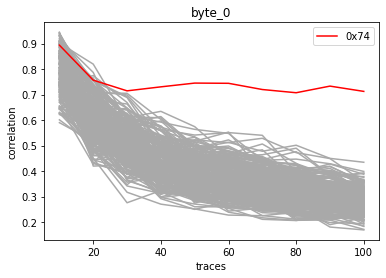

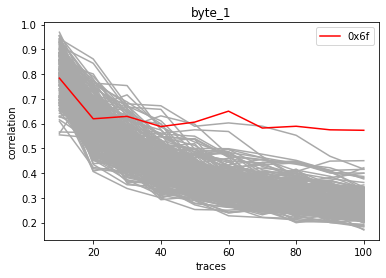

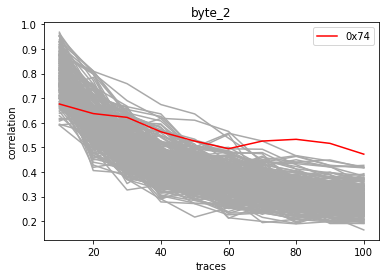

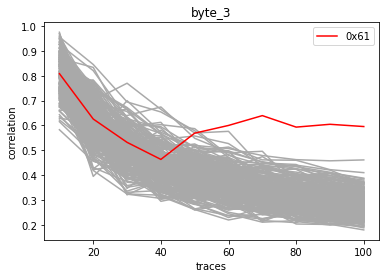

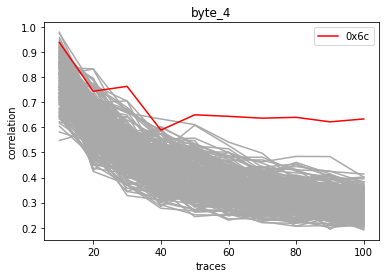

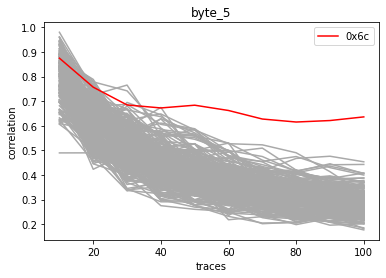

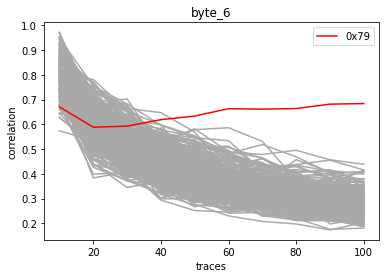

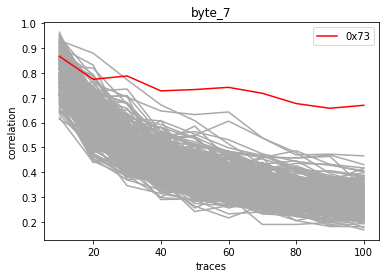

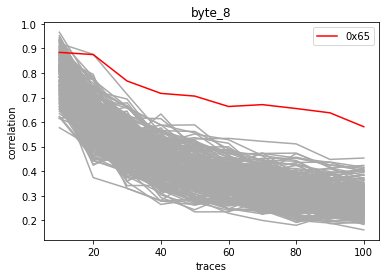

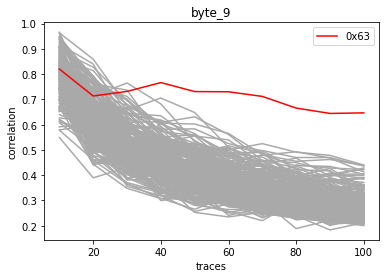

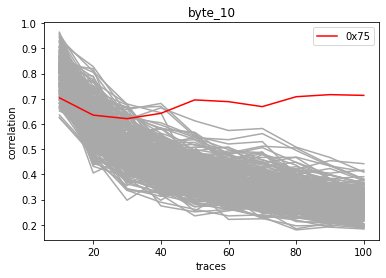

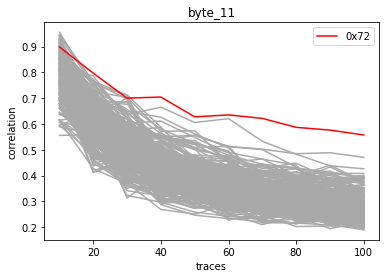

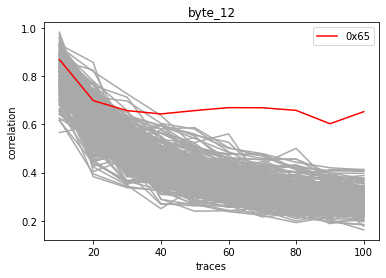

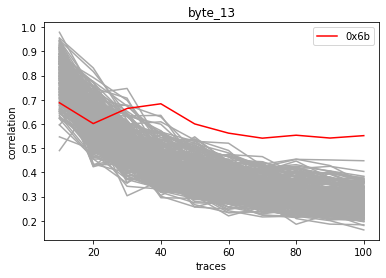

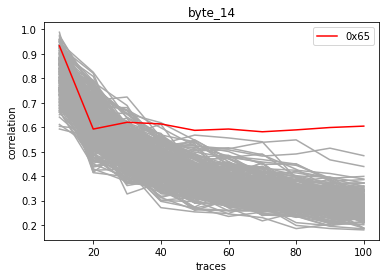

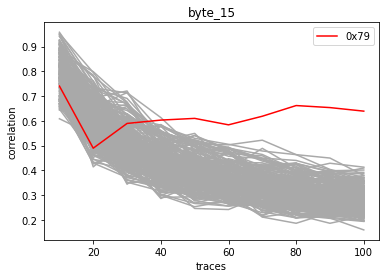

In [44]:
index = range(10,110,10)
# plt.rcParams["figure.figsize"] = (20,10)

for i in range(16):
    byte = "byte_" + str(i)
    byte_image = 'images/plot2/' + byte + ".jpeg"
    key_byte = predicted_key_bytes[i]
    key_byte_hex = str(predicted_key_bytes_hex[i])

    for j in range(256):
        if j != key_byte:
            plt.plot(index, coeff_matrix_per_byte[i][j], 'darkgrey')
    plt.plot(index, coeff_matrix_per_byte[i][key_byte], 'r', label = key_byte_hex)
    plt.title(byte)
    plt.xlabel("traces")
    plt.ylabel("correlation")
    plt.legend()
    plt.savefig(byte_image)
    plt.show()

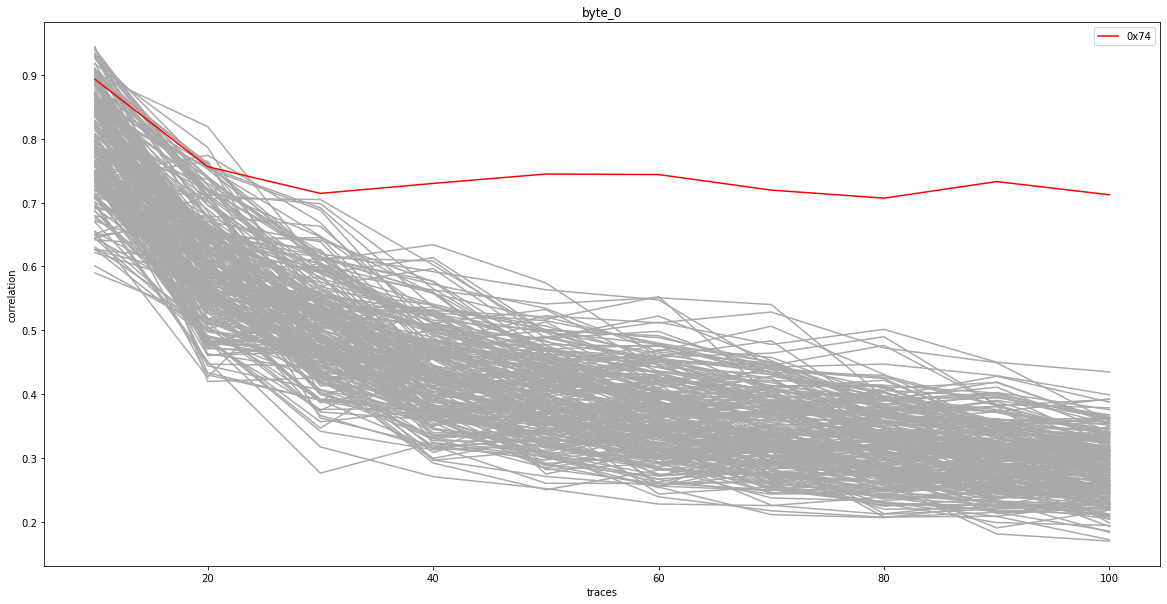

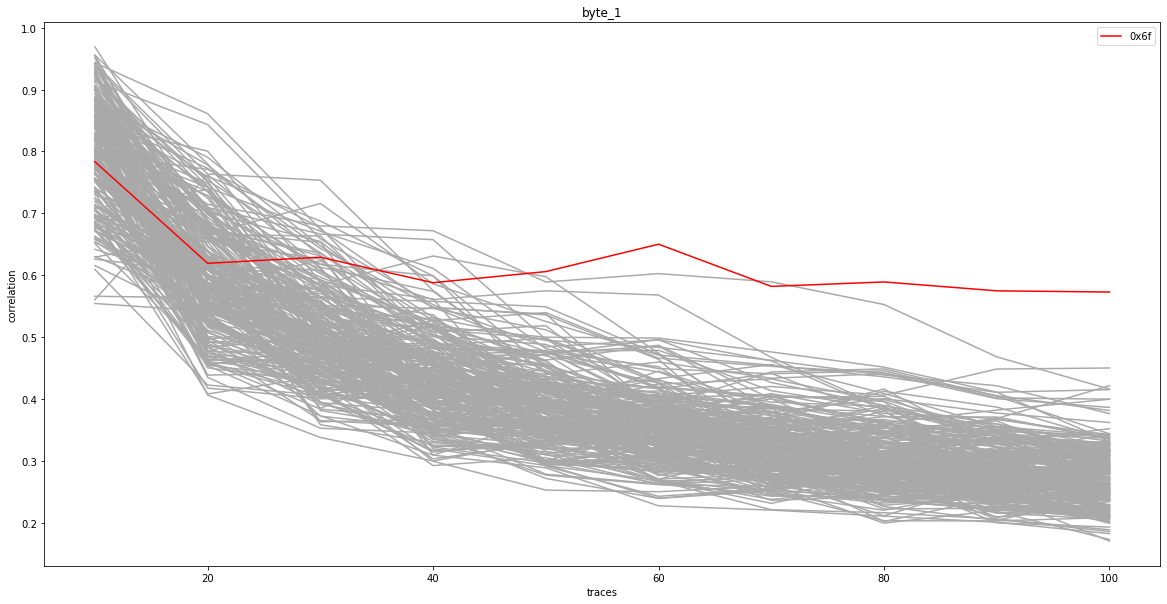

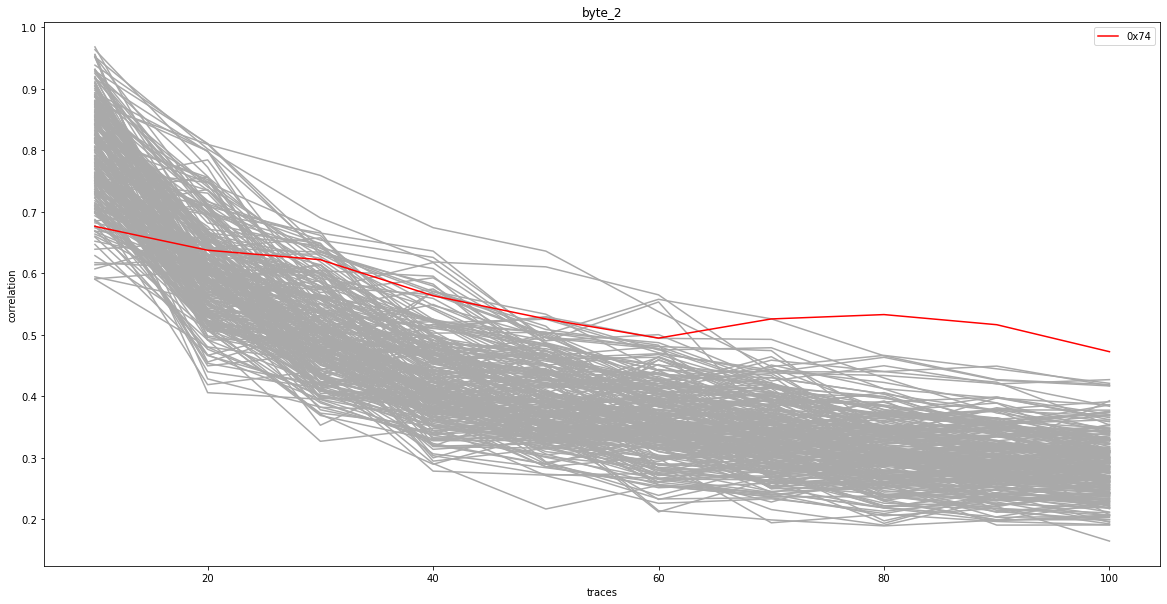

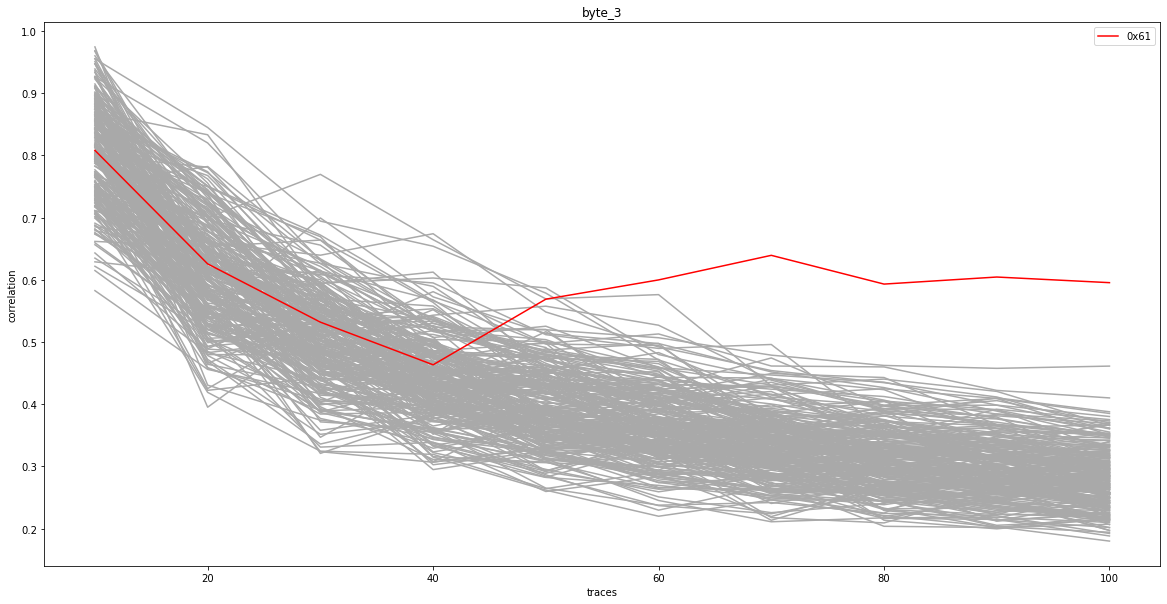

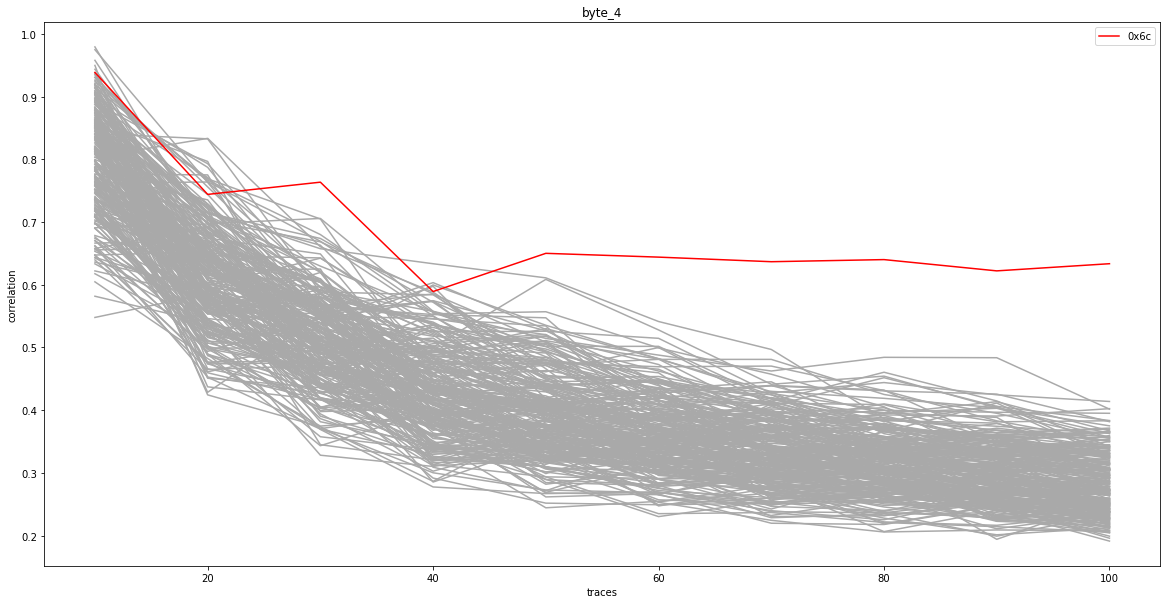

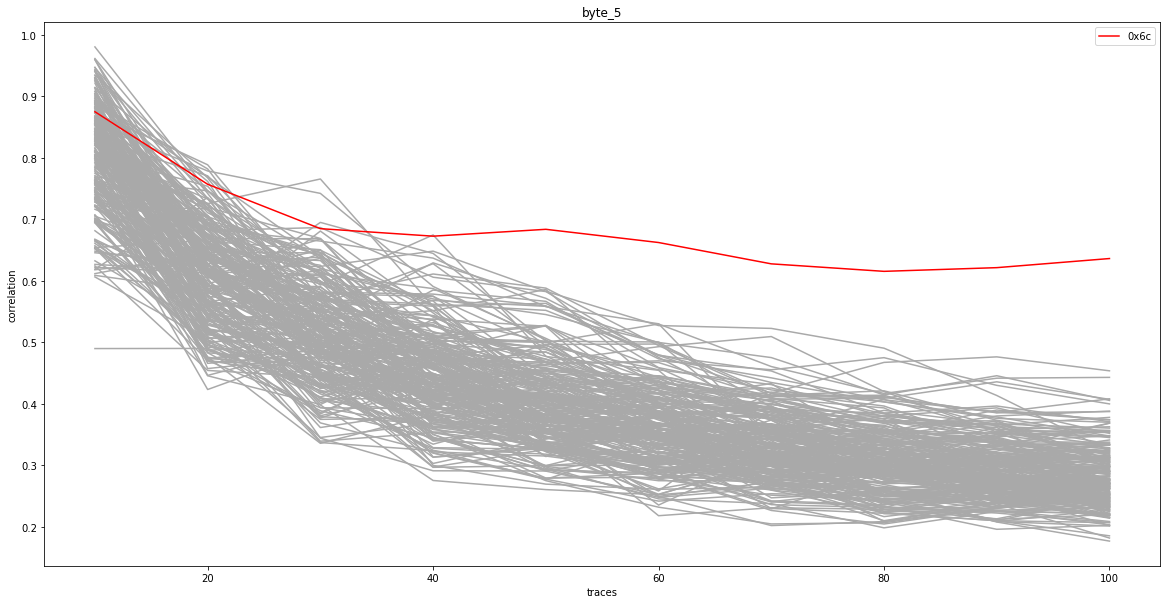

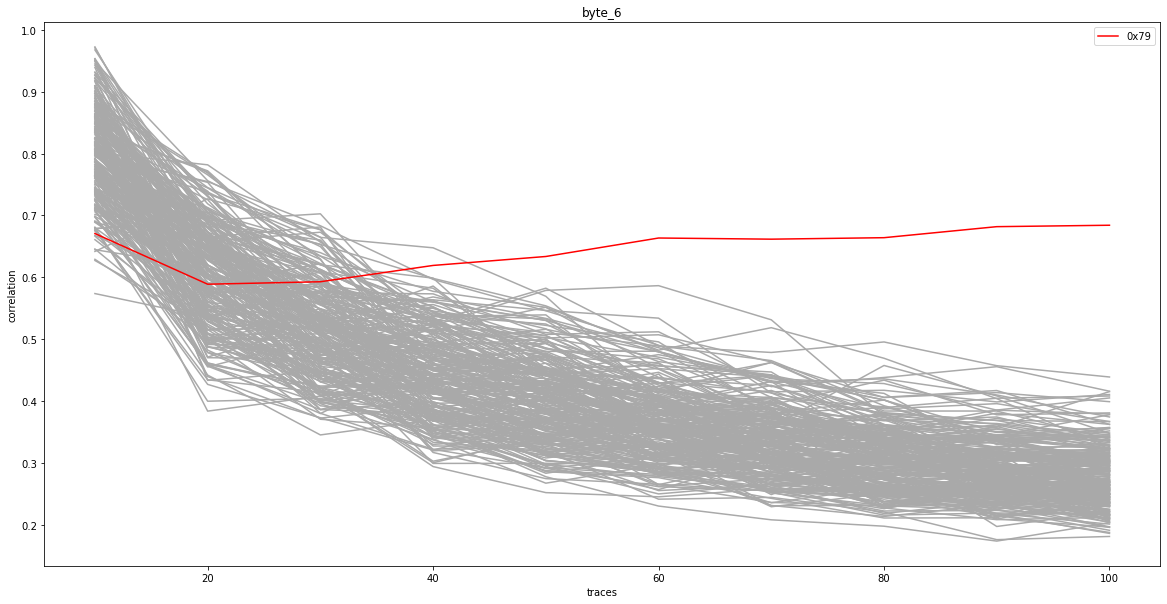

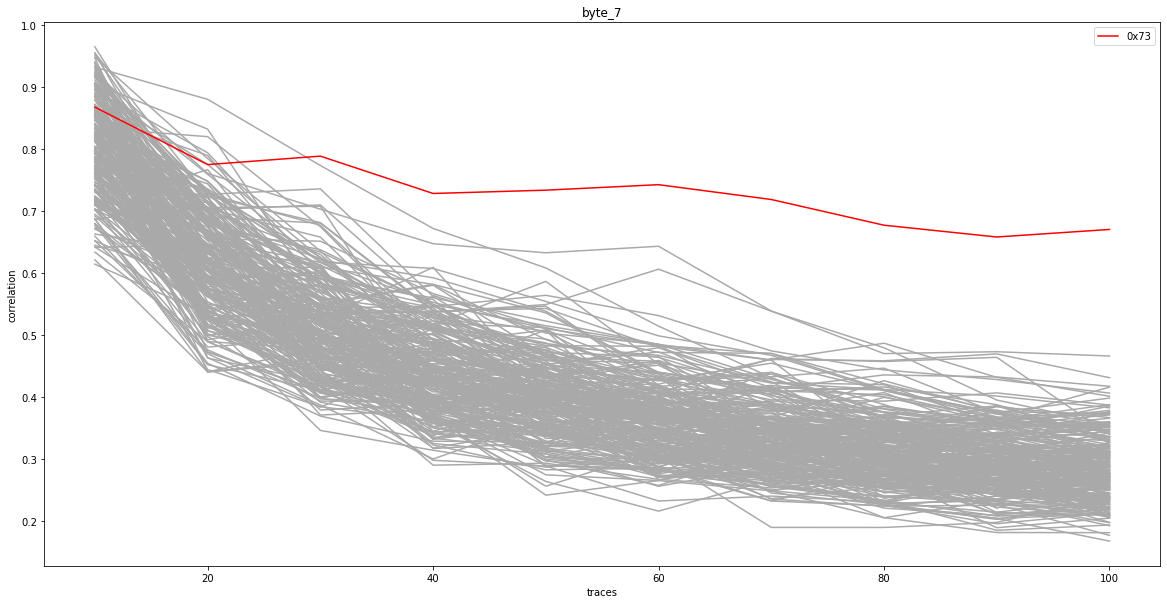

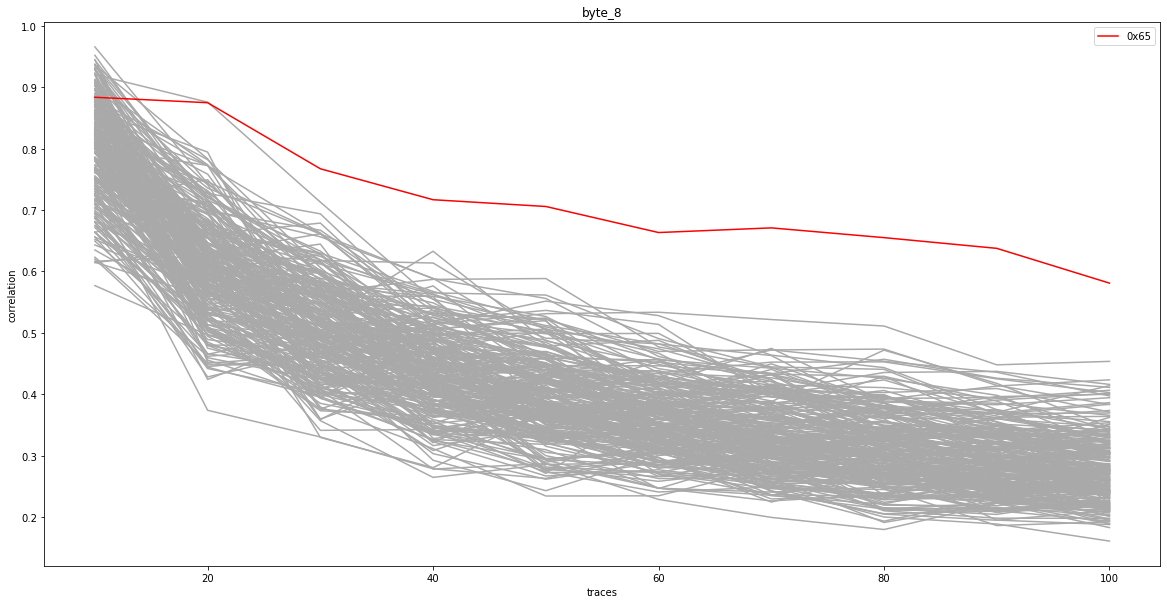

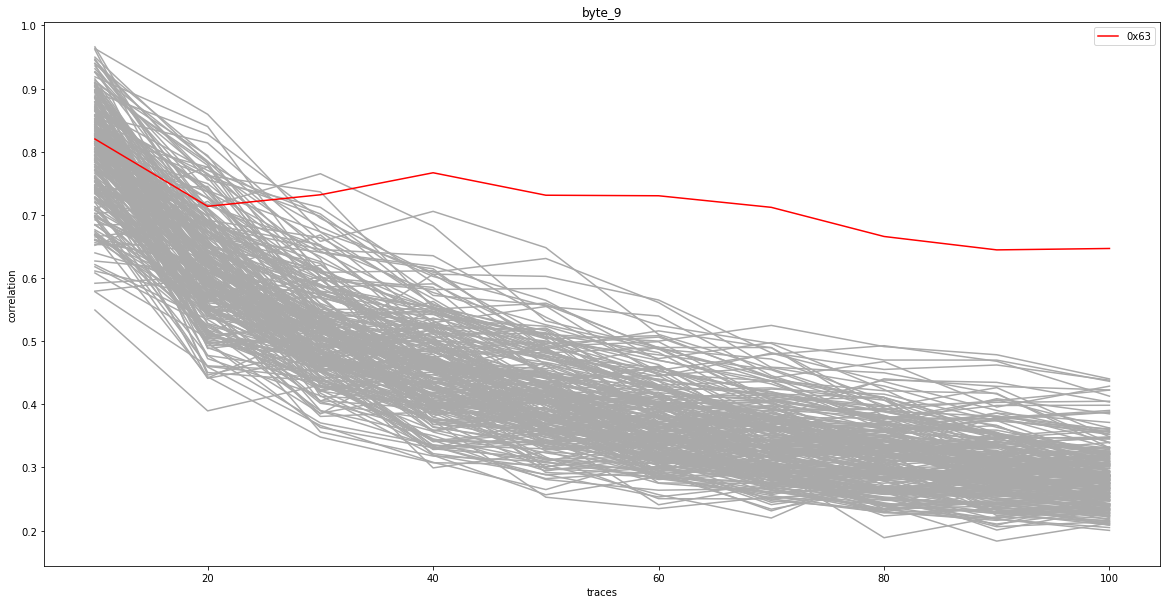

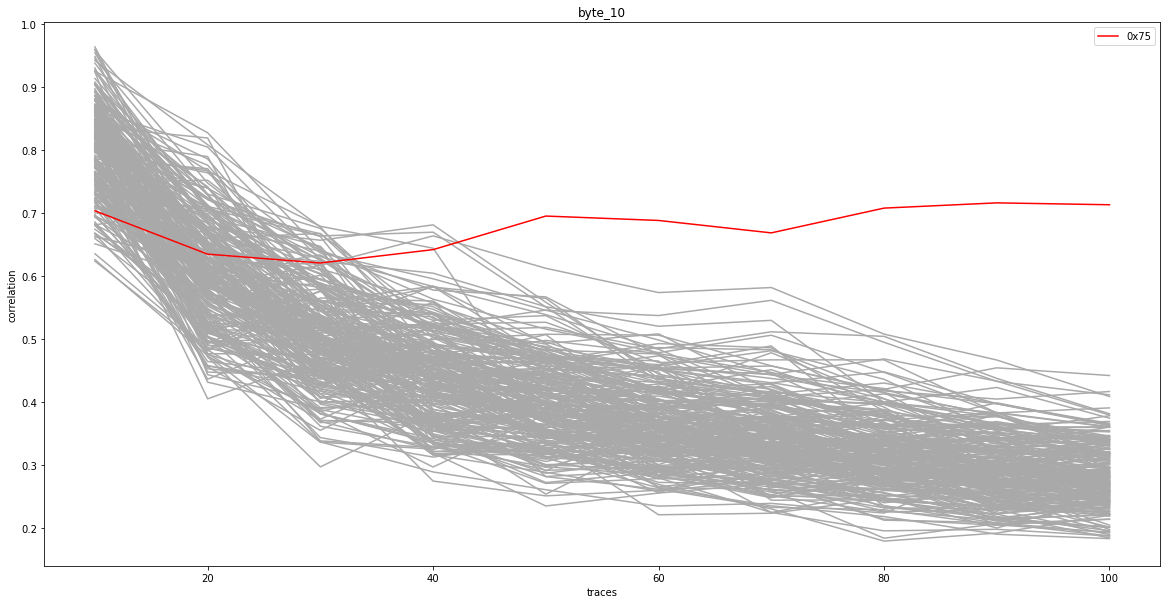

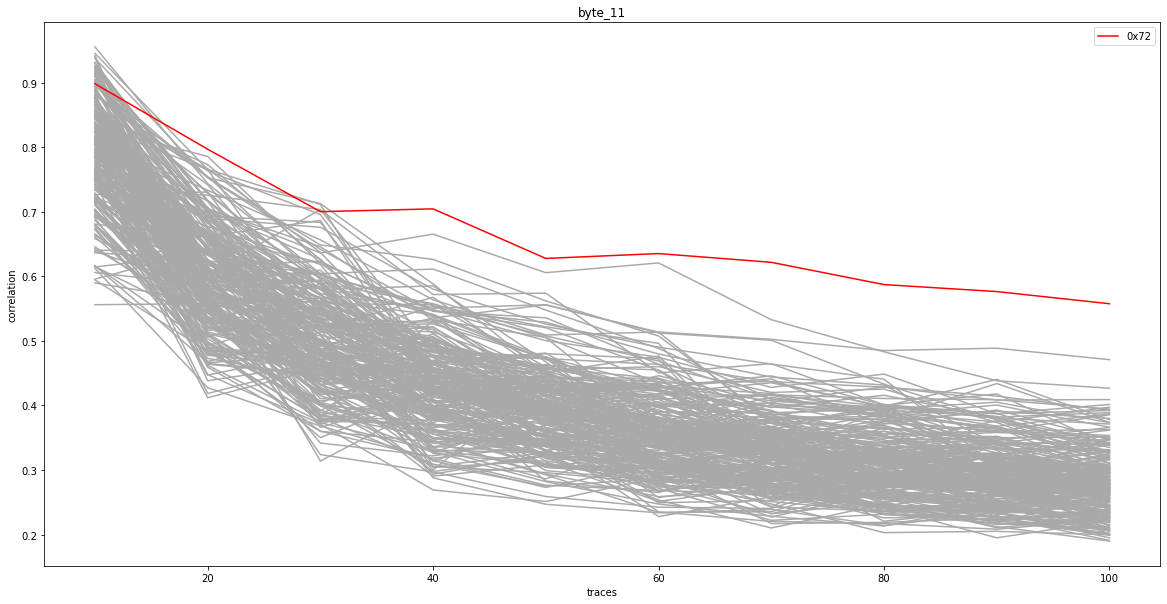

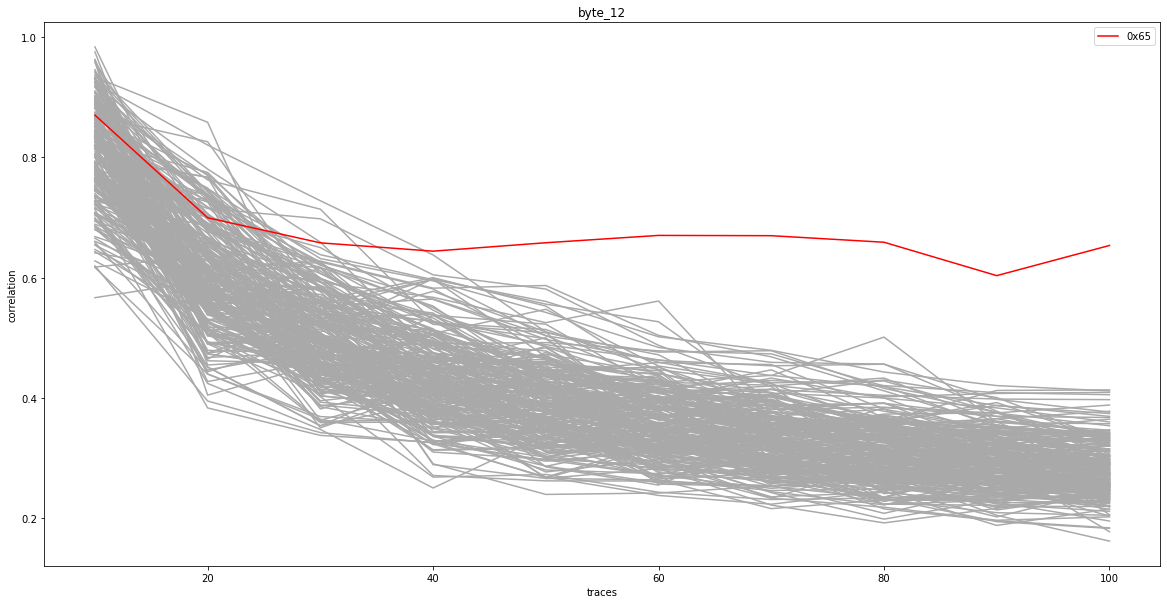

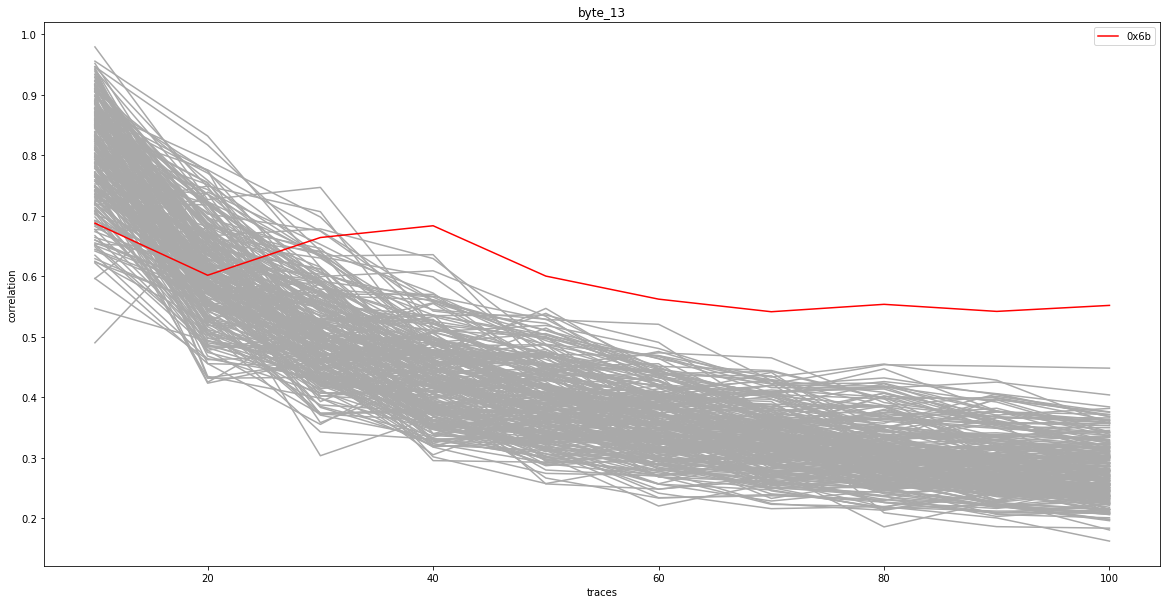

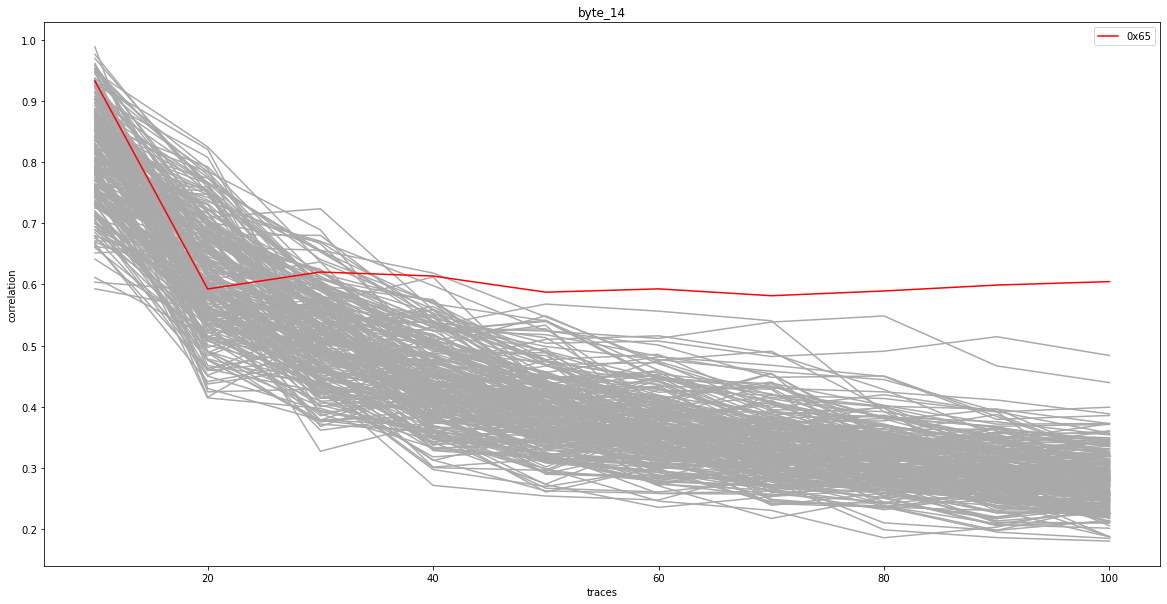

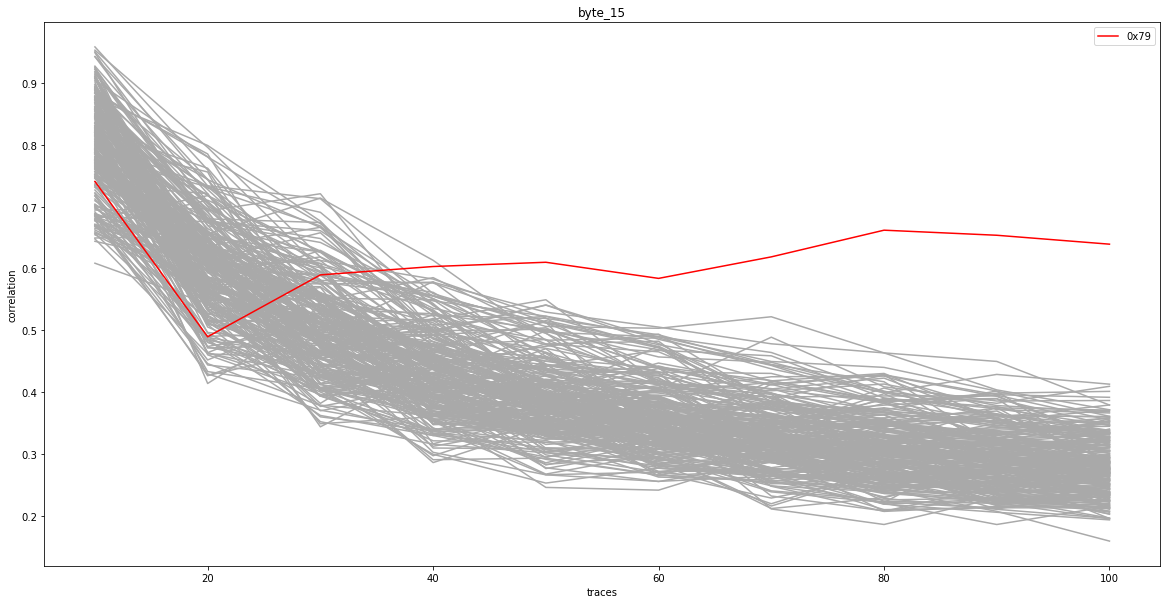

In [46]:
index = range(10,110,10)
plt.rcParams["figure.figsize"] = (20,10)

for i in range(16):
    byte = "byte_" + str(i)
    byte_image = 'images/plot2_big/' + byte + ".jpeg"
    key_byte = predicted_key_bytes[i]
    key_byte_hex = str(predicted_key_bytes_hex[i])

    for j in range(256):
        if j != key_byte:
            plt.plot(index, coeff_matrix_per_byte[i][j], 'darkgrey')
    plt.plot(index, coeff_matrix_per_byte[i][key_byte], 'r', label = key_byte_hex)
    plt.title(byte)
    plt.xlabel("traces")
    plt.ylabel("correlation")
    plt.legend()
    plt.savefig(byte_image)
    plt.show()

In [47]:
for i in range(16):
    byte = "byte_" + str(i)
    byte_file = 'resultant_coeff_matrix/plot2/' + byte + ".csv"
    df = pd.DataFrame(coeff_matrix_np[i]) 
    df.to_csv(byte_file) 